# ## Problem Statement
#Create an image classifier to identify the actors in the 
#images within the test dataset with any of keras, tensorflow,  pytorch or scikit-learn.

In [4]:
cd C:\Users\harsha.teja\Desktop\myg\Test\convertics\indian-actor-dataset

C:\Users\harsha.teja\Desktop\myg\Test\convertics\indian-actor-dataset


In [2]:
#Import all the Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow import keras 


C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
#Set all the Constants
BATCH_SIZE = 32
IMAGE_SIZE = 160
CHANNELS=3
EPOCHS=50

# Import Actors Dataset

In [5]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4694 files belonging to 135 classes.


In [6]:
class_names = dataset.class_names
print(class_names)
len(class_names)

['abhay_deol', 'adil_hussain', 'ajay_devgn', 'akshay_kumar', 'akshaye_khanna', 'amitabh_bachchan', 'amjad_khan', 'amol_palekar', 'amole_gupte', 'amrish_puri', 'anil_kapoor', 'annu_kapoor', 'anupam_kher', 'anushka_shetty', 'arshad_warsi', 'aruna_irani', 'ashish_vidyarthi', 'asrani', 'atul_kulkarni', 'ayushmann_khurrana', 'boman_irani', 'chiranjeevi', 'chunky_panday', 'danny_denzongpa', 'darsheel_safary', 'deepika_padukone', 'deepti_naval', 'dev_anand', 'dharmendra', 'dilip_kumar', 'dimple_kapadia', 'farhan_akhtar', 'farida_jalal', 'farooq_shaikh', 'girish_karnad', 'govinda', 'gulshan_grover', 'hrithik_roshan', 'huma_qureshi', 'irrfan_khan', 'jaspal_bhatti', 'jeetendra', 'jimmy_sheirgill', 'johnny_lever', 'kader_khan', 'kajol', 'kalki_koechlin', 'kamal_haasan', 'kangana_ranaut', 'kay_kay_menon', 'konkona_sen_sharma', 'kulbhushan_kharbanda', 'lara_dutta', 'madhavan', 'madhuri_dixit', 'mammootty', 'manoj_bajpayee', 'manoj_pahwa', 'mehmood', 'mita_vashisht', 'mithun_chakraborty', 'mohanlal'

135

In [7]:
len(dataset)

147

In [8]:
class_names = np.array(dataset.class_names)
print(class_names)

['abhay_deol' 'adil_hussain' 'ajay_devgn' 'akshay_kumar' 'akshaye_khanna'
 'amitabh_bachchan' 'amjad_khan' 'amol_palekar' 'amole_gupte'
 'amrish_puri' 'anil_kapoor' 'annu_kapoor' 'anupam_kher' 'anushka_shetty'
 'arshad_warsi' 'aruna_irani' 'ashish_vidyarthi' 'asrani' 'atul_kulkarni'
 'ayushmann_khurrana' 'boman_irani' 'chiranjeevi' 'chunky_panday'
 'danny_denzongpa' 'darsheel_safary' 'deepika_padukone' 'deepti_naval'
 'dev_anand' 'dharmendra' 'dilip_kumar' 'dimple_kapadia' 'farhan_akhtar'
 'farida_jalal' 'farooq_shaikh' 'girish_karnad' 'govinda' 'gulshan_grover'
 'hrithik_roshan' 'huma_qureshi' 'irrfan_khan' 'jaspal_bhatti' 'jeetendra'
 'jimmy_sheirgill' 'johnny_lever' 'kader_khan' 'kajol' 'kalki_koechlin'
 'kamal_haasan' 'kangana_ranaut' 'kay_kay_menon' 'konkona_sen_sharma'
 'kulbhushan_kharbanda' 'lara_dutta' 'madhavan' 'madhuri_dixit'
 'mammootty' 'manoj_bajpayee' 'manoj_pahwa' 'mehmood' 'mita_vashisht'
 'mithun_chakraborty' 'mohanlal' 'mohnish_bahl' 'mukesh_khanna'
 'mukul_dev' 'na

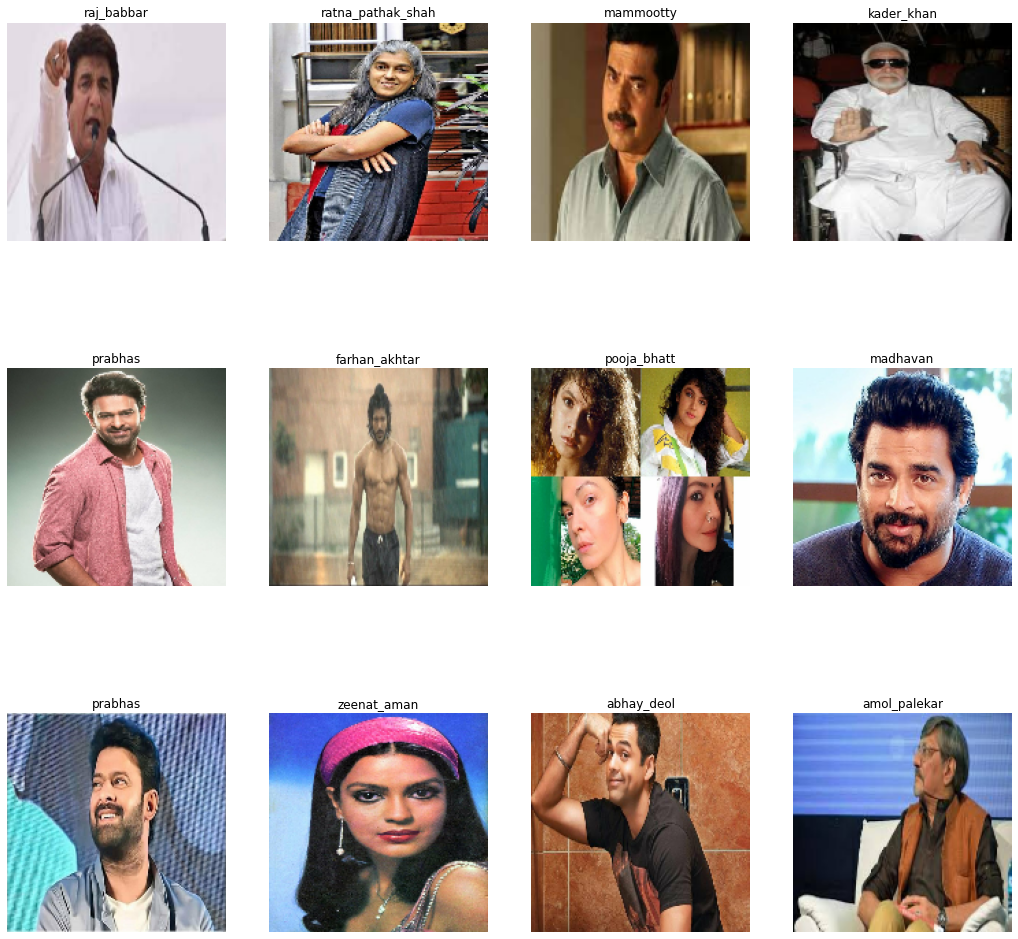

In [9]:
#plotting somesamples
plt.figure(figsize=(18, 18))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [15]:

train_dataset, validation_dataset , test_dataset = get_dataset_partitions_tf(dataset)

In [54]:

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [55]:
#data_augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

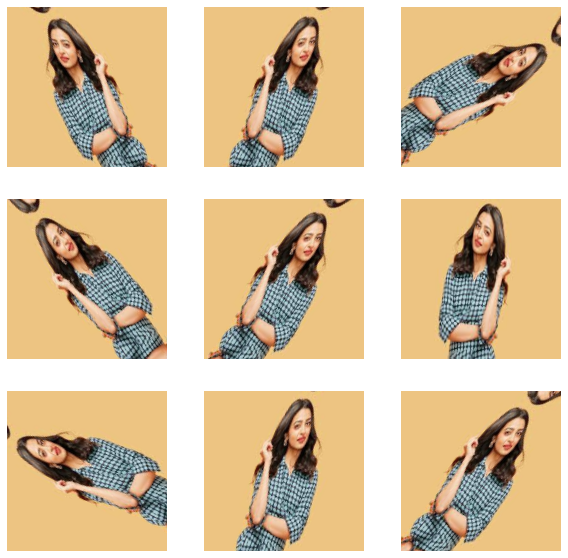

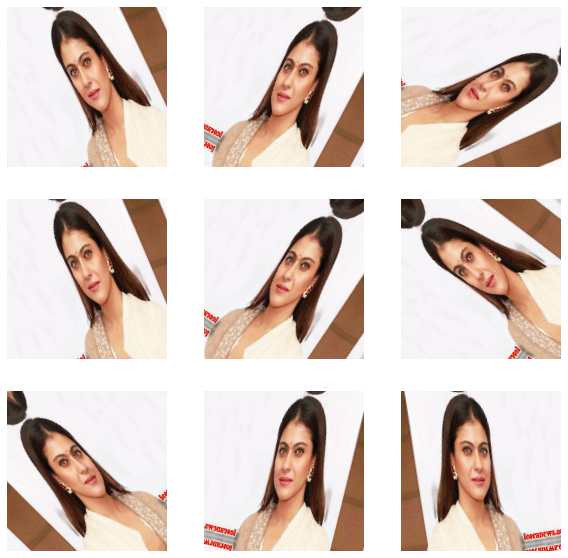

In [56]:
#plotting data_augmentation
for image, _ in train_dataset.take(2):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [60]:
#Downloading mobile v2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (160,160)
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [61]:
#checking shape
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [63]:
# Let's take a look at the base model architecture
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [64]:
#global_average_layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
#output layer 
prediction_layer = tf.keras.layers.Dense(135)


In [66]:
#model Bulding 
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)

x =tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1280, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1311

In [69]:
len(model.trainable_variables)

8

In [70]:
initial_epochs = 100

loss0, accuracy0 = model.evaluate(validation_dataset)

22/22 [==============================] - 63s 797ms/step - loss: 4.9972 - accuracy: 0.0000e+00


In [71]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 5.00
initial accuracy: 0.00


In [ ]:
from tensordash.tensordash import Tensordash
histories = Tensordash(
    ModelName = 'Mobilenet',
    email = 'harshabolla@gmail.com', 
    password = '*******')

In [ ]:
#callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint1 = ModelCheckpoint("mobilenet.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early1 = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [73]:
#fiting the model
history = model.fit(train_dataset,validation_data=validation_dataset,
                    epochs=initial_epochs,callbacks=[checkpoint])

Epoch 1/100
102/102 [==============================] - 148s 1s/step - loss: 4.9504 - accuracy: 0.0098 - val_loss: 4.8157 - val_accuracy: 0.0185

Epoch 00001: val_accuracy improved from -inf to 0.01847, saving model to mobilenet.h5


C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
102/102 [==============================] - 120s 1s/step - loss: 4.7948 - accuracy: 0.0251 - val_loss: 4.6445 - val_accuracy: 0.0668

Epoch 00002: val_accuracy improved from 0.01847 to 0.06676, saving model to mobilenet.h5
Epoch 3/100
102/102 [==============================] - 88s 785ms/step - loss: 4.6233 - accuracy: 0.0433 - val_loss: 4.4078 - val_accuracy: 0.0793

Epoch 00003: val_accuracy improved from 0.06676 to 0.07925, saving model to mobilenet.h5
Epoch 4/100
102/102 [==============================] - 87s 781ms/step - loss: 4.4391 - accuracy: 0.0535 - val_loss: 4.1674 - val_accuracy: 0.0909

Epoch 00004: val_accuracy improved from 0.07925 to 0.09091, saving model to mobilenet.h5
Epoch 5/100
102/102 [==============================] - 89s 804ms/step - loss: 4.2452 - accuracy: 0.0756 - val_loss: 4.0039 - val_accuracy: 0.1236

Epoch 00005: val_accuracy improved from 0.09091 to 0.12358, saving model to mobilenet.h5
Epoch 6/100
102/102 [==============================] - 89s

history = model.fit(train_dataset,validation_data=validation_dataset,
                    epochs=initial_epochs,
                    steps_per_epoch=len(train_dataset) // 32,
                    validation_steps=len(validation_dataset) // 32,
                    callbacks=[checkpoint,early])

In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

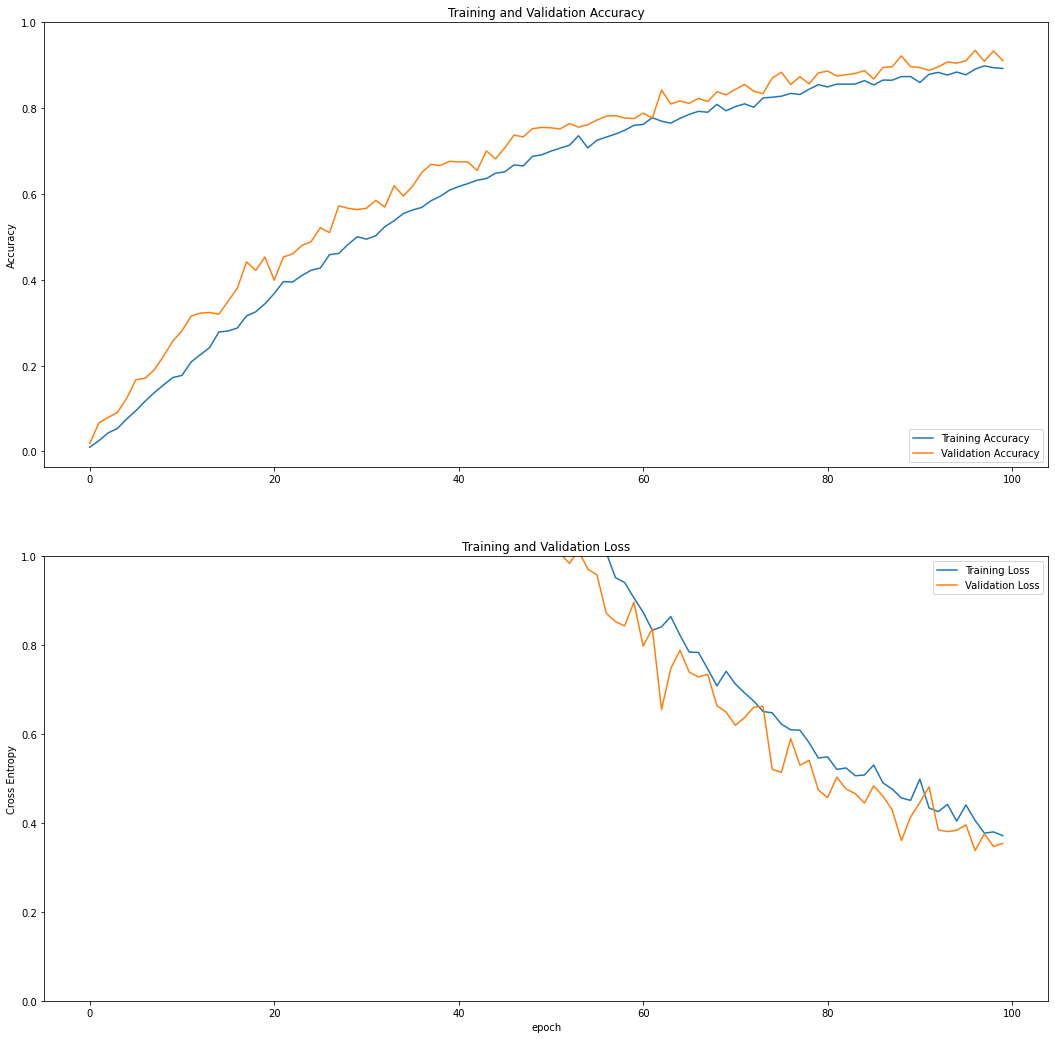

In [75]:
#ploting the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(18, 18))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [77]:
#fine Tuning the model
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [131]:
#callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint1 = ModelCheckpoint("mobilenet_after_tune.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early1 = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [106]:
#initializing optimzer 
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [108]:
#fitting the model
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,callbacks=[checkpoint1])

Epoch 100/150
102/102 [==============================] - 120s 1s/step - loss: 0.1061 - accuracy: 0.9678 - val_loss: 0.0550 - val_accuracy: 0.9886
Epoch 101/150
102/102 [==============================] - 123s 1s/step - loss: 0.1118 - accuracy: 0.9662 - val_loss: 0.0514 - val_accuracy: 0.9872
Epoch 102/150
102/102 [==============================] - 122s 1s/step - loss: 0.1074 - accuracy: 0.9671 - val_loss: 0.0564 - val_accuracy: 0.9858
Epoch 103/150
102/102 [==============================] - 126s 1s/step - loss: 0.1087 - accuracy: 0.9694 - val_loss: 0.0345 - val_accuracy: 0.9929
Epoch 104/150
102/102 [==============================] - 125s 1s/step - loss: 0.1036 - accuracy: 0.9697 - val_loss: 0.0694 - val_accuracy: 0.9773
Epoch 105/150
102/102 [==============================] - 126s 1s/step - loss: 0.1006 - accuracy: 0.9717 - val_loss: 0.0492 - val_accuracy: 0.9915
Epoch 106/150
102/102 [==============================] - 129s 1s/step - loss: 0.0960 - accuracy: 0.9730 - val_loss: 0.0506 -

In [123]:
#calclating loss and accuracy on test dataset
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

23/23 [==============================] - 55s 601ms/step - loss: 0.0289 - accuracy: 0.9932
Test accuracy : 0.9932065010070801


In [164]:
# make a prediction
predictions = model.predict(test_dataset, steps=len(validation_dataset), verbose=1)

22/22 [==============================] - 33s 817ms/step


In [125]:
import time
t = time.time()

export_path = "/saved_models/{}".format(int(t))
model.save(export_path)

export_path

INFO:tensorflow:Assets written to: /saved_models/1634361181\assets


C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


'/saved_models/1634361181'

In [11]:
#predicating on Test dataset
img_height, img_width = 160,160
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    #confidence = round(100 * (np.max(predictions[0])), 2)
    confidence = tf.nn.softmax(predictions[0])
    confidence = round(100 * (np.max(confidence)),2)
    return predicted_class, confidence

C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


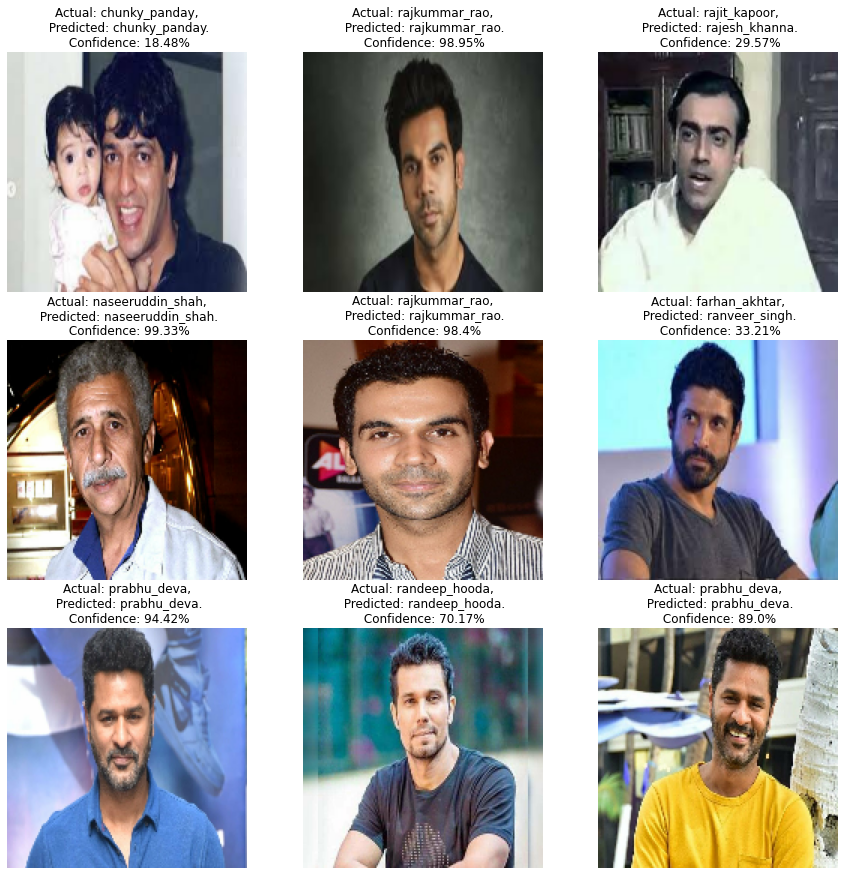

In [16]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(10):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

C:\Users\harsha.teja\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


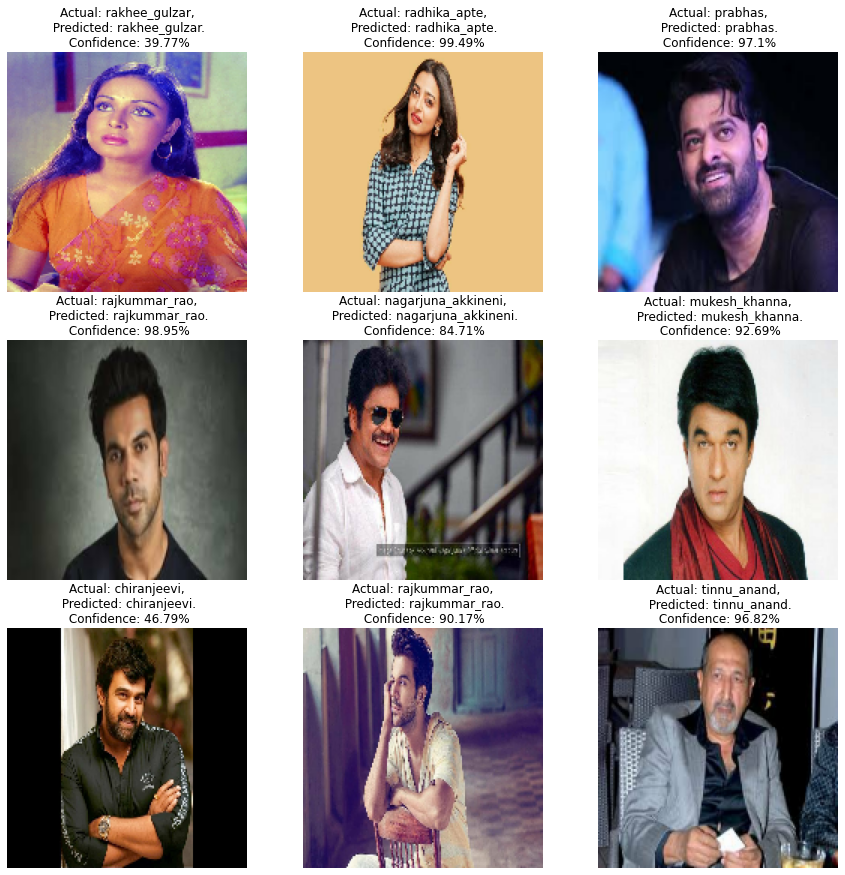

In [17]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(10):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
#predication of test Images will be done another file 

# By Harsha Teja Bolla